In [1]:
import pandas as pd
import country_converter as coco
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
# pio.renderers.default = 'browser'  
warnings.filterwarnings('ignore')
import pycountry

%matplotlib inline

In [2]:
data =  pd.read_csv('../data/ds_salaries2.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           2584 non-null   int64  
 1   experience_level    2584 non-null   object 
 2   employment_type     2584 non-null   object 
 3   job_title           2584 non-null   object 
 4   salary_in_usd       2584 non-null   int64  
 5   employee_residence  2584 non-null   object 
 6   remote_ratio        2584 non-null   float64
 7   company_location    2584 non-null   object 
 8   company_size        2584 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 181.8+ KB


Dealing with Categorical Data

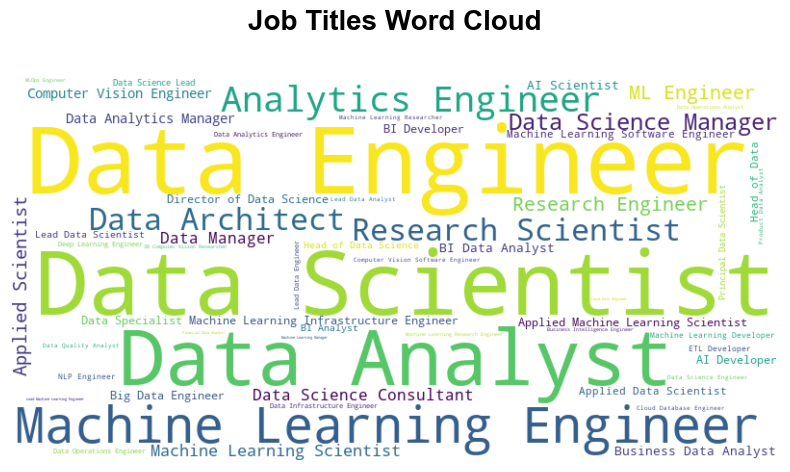

In [4]:
# Presenting the categorical columns visually - plotting 
# Plotting job title as word cloud:
job_titles = data['job_title'].value_counts().to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(job_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Job Titles Word Cloud', fontsize=20, pad=20,  fontweight='bold', fontname='Arial', loc='center', y=1.05)
plt.show()

The word cloud generated from job titles clearly highlights the most frequently occurring roles within the dataset.

The top three dominant roles are:
1. **Data Scientist**
2. **Data Engineer**
3. **Data Analyst**

These titles appear prominently, indicating that the majority of employees in this dataset are engaged in **core data-related positions**.

Additionally, roles such as **Machine Learning Engineer**, **Analytics Engineer**, and **Applied Scientist** also appear noticeably, suggesting strong representation of machine learning and data infrastructure roles.

### 🔍 Insight:
The dominance of these roles reflects the current demand in the data industry for professionals skilled in **data manipulation, infrastructure, and predictive modeling**. This distribution can also help organizations benchmark their hiring strategies or identify gaps in specific job domains.


In [5]:
# Set style and color palette
sns.set_theme(style="whitegrid")
custom_palette = sns.color_palette("Set2")

In [6]:
# 1. Histogram of Salary
fig = px.histogram(data, x='salary_in_usd',
                nbins=40,
                title='Distribution of Salaries (USD)',
                labels={'salary_in_usd': 'Salary in USD'},
                color_discrete_sequence=['#4C72B0'])
fig.update_layout(
    xaxis_title='Salary in USD',
    yaxis_title='Number of Employees',
    bargap=0.1
)
fig.update_geos(showcoastlines=True, coastlinecolor="RebeccaPurple")
fig.show()

The histogram illustrates the distribution of salaries.

- It is clearly observable that the **majority of salaries fall within the range of approximately 60,000 to 160,000 USD**, indicating that most employees are compensated within this central range.

- The distribution shows **a right (positive) skew**, with a long tail extending beyond 200,000 USD. This suggests that while a few individuals earn significantly higher salaries, such cases are **outliers** and not representative of the majority.

- The **peak frequency** appears around the 120,000 USD mark, highlighting this value as a common salary benchmark within the given dataset.

### 🔎 Insight:
The salary distribution is not symmetric, and the presence of high outliers pulls the mean upward, which implies that **median salary may be a better central tendency indicator** than the mean in this case!

In [7]:
# 2. Count Employees by Category
count_categories = ['experience_level', 'company_size', 'employment_type']

for col in count_categories:
    fig = px.bar(
        data_frame=data[col].value_counts().reset_index(),
        x='count',
        y=col,
        labels={col: col.replace('_', ' ').title()},
        title=f"Count of {col.replace('_', ' ').title()}",
        text=col,
        color=col,  # optional to differentiate bars by color
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        xaxis_title=col.replace('_', ' ').title(),
        yaxis_title='Count',
        showlegend=False
    )
    fig.show()


### Experience Level – Count Summary

- 1. **Senior level** has the **highest number of employees** (~1550), meaning most people in the dataset are seniors.  
- 2. **Executive level** is the **least common**, with less than 100 employees.  
- 3. **Mid level** comes second (~660), and **Entry level** is third (~270) — both much lower than Senior, but still higher than Executive.

 **🔍 Conclusion:**  
Most employees are at the **Senior level**, while very few are **Executives**. There's a big jump between the Executive tier and all other levels.


### Company Size – Count Summary

- **Medium-sized companies** dominate the dataset, with around **2030 employees**.  
- **Large companies** come next (~410), while **Small companies** are the least represented (~150).  

**🔍 Conclusion:**  
The majority of data science employees work in **medium-sized companies**, with fewer in large and very few in small ones.


### Employment Type – Count Summary

- **Full-time jobs** dominate by a huge margin, with over **2500 employees**.  
- **Part-time**, **Contract**, and **Freelance** roles are all **very minimal** in comparison, each having a very small count.

**🔍 Conclusion:**  
The overwhelming majority of data science roles are **full-time positions**, with alternative types like part-time or freelance being **rare**. 
This huge gap may reflect the **sensitive nature of data-related work**, where companies prefer **in-house staff** to ensure **security and accountability**, making freelance, part-time, and contract-based roles less common.

In [8]:
# 3. Boxplots for Salary by Categories (Experience Level, Employment Type, Company Size, Remote Ratio)
boxplot_categories = ['experience_level', 'employment_type', 'company_size', 'remote_ratio']

for col in boxplot_categories:
    fig = px.box(
        data_frame=data,
        x=col,
        y="salary_in_usd",
        color=col,
        title=f"Salary Distribution by {col.replace('_', ' ').title()}",
        labels={col: col.replace('_', ' ').title(), "salary_in_usd": "Salary in USD"},
        color_discrete_sequence=px.colors.qualitative.Set2,
        points="outliers"  # Show outlier points
    )
    fig.update_layout(
        xaxis_title=col.replace('_', ' ').title(),
        yaxis_title='Count',
        showlegend=False
    )
    # Optional: show mean marker
    # fig.update_traces(boxmean=True)
    fig.show()


The "Salary Distribution by employment Type" chart shows how salaries vary depending on the employment type.
(Based on the earlier salary distribution chart, we’ll focus on the **median salary** as the best central Tendancy measure.)

- **1. Full-time jobs** have the **widest salary range**, and clearly the **highest median**.  
  There are also many people earning much more than the average (outliers), which means full-time jobs are more diverse — from entry-level to high-level roles.  
  This also explains why the full salary distribution looks uneven (these outliers are causing the skewness and asymetry in the salaries distribution chart shown before).

- **2. Freelancers** have the **most stable salary range**, with only **one outlier**.  
  Their salaries are lower overall, but more consistent. Interestingly, the **lowest freelance salary** is slightly higher than in other categories, maybe because freelance work often has a set project rate.

- **3. Contract jobs** fall somewhere in the middle — **more stable** than full-time, but usually **higher than freelance or part-time**.  
  The few outliers mean salaries don’t jump too much from one person to another.

- **4. Part-time jobs** have the **lowest and most consistent salaries**.  
  They don’t vary much, and rarely reach high levels, which is expected as these roles are usually more basic or limited in time.

### 🔍 Conclusion:
The type of employment clearly affects how much people earn.  
Full-time jobs offer the highest potential but come with big differences in pay 'it may be depending on experience level also'.  
Freelance and part-time jobs are more predictable, but the salaries are generally lower.

The "Salary Distribution by Company Size" chart shows how salaries vary based on company size.

- 1. For **small companies**, it's clear they have the **lowest median salary** among all groups.  
  They also have **fewer outliers**, which means their salary range is more consistent.  
  Interestingly, the **lowest salary** in small companies is **slightly higher** than in medium and large ones!

- 2. **Medium companies** have the **highest median salary**, and also show the **highest maximum salaries**.  
  They also have the **most outliers**, which tells us that salaries in medium companies can vary a lot.

- 3. **Large companies** have a **wide salary range**.  
  They don’t have the highest median, but they offer many salaries in the mid-to-high range.

### 🔍 Summary:
Company size does affect how salaries are distributed.  
**Small companies** tend to be more consistent but pay less,  
**medium companies** have higher and more variable salaries,  
and **large companies** fall somewhere in between with a wider middle range.


The "Salary Distribution by Experience Level" chart shows some clear insights:

1. **Entry level**:  
   Has the **lowest median** and the **lowest maximum salary**.  
   There are some outliers, but overall, entry-level employees are mostly paid less than the other levels.

2. **Mid level**:  
   Salaries are **higher than entry-level**, with a better median and maximum salary.  
   Still, mid-level pay is below senior and executive levels.

3. **Senior level**:  
   Has a **higher median and maximum** than both entry and mid-level.  
   But it also has the **largest number of outliers**, which means salaries are less consistent and can depend on other factors (like company size or type).  
   The **minimum salary** is also slightly higher compared to entry and mid-level.

4. **Executive level**:  
   Shows the **highest salaries overall** – median, minimum, and maximum.  
   Interestingly, the **median executive salary** is higher than the **maximum salary of entry-level employees**.  
   There is only one outlier, which means executive pay is generally more consistent.

   
### 🔍 Summary:
- Salaries clearly rise with experience level, moving from entry to executive roles.
- Executive positions offer not just the highest pay, but also the most consistent salary range.

From the "Salary Distribution by Remote Ratio" chart, we can spot a few clear things:

1. **0 (Fully On-Site Work)**:  
   People working fully from the office have the **highest average salary** overall.  
   Also, the top salaries in this group are the highest compared to the others.  
   There’s a bit of variation, but the distribution looks stable.

2. **0.5 (Partially Remote)**:  
   This group has the **lowest average and maximum salaries**.  
   There's also some spread in salaries, and a few outliers.  
   Maybe being in-between (not fully remote or on-site) affects how much they get paid.

3. **1 (Fully Remote)**:  
   Fully remote workers earn salaries that are **very close to on-site workers** in terms of average and top values.  
   But their salary range is a bit wider.  
   Still, it's clear that full remote jobs are doing better than half-remote in terms of pay.

   
### 🔍 Summary:
Fully on-site and fully remote jobs offer higher and more stable salaries compared to partially remote ones.
Partially remote roles tend to have lower average pay and more variability.

In [9]:
# Analyzing the most common job titles -top 15
top_jobs = data['job_title'].value_counts().nlargest(15)

top_jobs_df = top_jobs.reset_index()
top_jobs_df.columns = ['Job Title', 'Count']

fig = px.bar(
    top_jobs_df,
    x='Count',
    y='Job Title',
    orientation='h',
    text='Count',
    title='Top 15 Most Common Job Titles',
    color='Job Title',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
# 
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    xaxis_title="Number of Employees",
    yaxis_title="Job Title",
    plot_bgcolor='rgba(240,240,255,0.6)',
    title_font_size=20
)

fig.show()


### Top 15 Most Common Job Titles

The chart highlights the **most frequent job titles** in the dataset.

- **Data Engineer** is the **most common role**, with nearly **600 entries**.  
  This reflects the growing need for infrastructure and pipeline expertise in modern data systems.

- **Data Scientist** comes in close second with about 540 entries, followed by **Data Analyst**.  
  These three roles dominate the field, representing the core of many data teams.

- **Machine Learning Engineers** also appear frequently, with over 200 entries — indicating growing industry demand.

- Other roles such as **Analytics Engineer**, **Research Scientist**, and **Data Architect** appear moderately.  

- Finally, titles like **Computer Vision Engineer** or **Data Science Consultant** are less common, but still of the top 15!

### 🔍 Conclusion:
This distribution shows that the data job market is heavily concentrated around a few key roles — especially **Data Engineers** and **Data Scientists**.  
Specialized roles do exist, but in smaller numbers. This may reflect actual workforce needs, or simply labeling variations across companies.


In [10]:
# Boxplot for Salary by Job Title (Top 15 most common job titles)
top10_jobs = data['job_title'].value_counts().nlargest(15).index
filtered_data = data[data['job_title'].isin(top10_jobs)]

fig = px.box(
    filtered_data,
    x='salary_in_usd',
    y='job_title',
    color='job_title',
    title='Salary Distribution for Top 15 Job Titles',
    labels={'salary_in_usd': 'Salary in USD', 'job_title': 'Job Title'},
    height=600
)

fig.update_layout(showlegend=False)
fig.show()


### Salary Distribution for Top 15 Job Titles

This boxplot compares how salaries vary across the 15 most common job titles in the dataset.  
It helps us see the **median salary**, **salary spread**, and **outliers** for each role.

- **ML Engineers** and **Data Scientists** have some of the **highest salary ranges**, with several high outliers.  
  This indicates their high demand and variability based on experience, location, or company size.

- **Applied Scientists** and **Data Analysts** show a **moderate but steady** salary range.  
  They don’t reach the extremes of other roles, but they remain relatively stable and predictable.

- Roles like **Analytics Engineer** and **Research Engineer** also maintain good medians,  
  with less variability than data science-heavy titles.

- Interestingly, **Computer Vision Engineers** have **very high upper bounds**,  
  but their median is not as impressive — perhaps reflecting niche demand or project-based contracts.

- Some roles like **Data Science Consultants** and **Data Managers** have **narrower salary ranges**,  
  indicating more consistency but less room for large jumps.

- Outliers are present across many roles — these could represent **senior professionals**, **consultants**,  
  or jobs in high-paying regions (like the US or Switzerland).

### 🔍 Conclusion:
Salaries vary not just by job title, but also by other factors like company, location, and seniority.  

In [11]:
# Function to convert ISO-2 to ISO-3 codes
def iso2_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except:
        return None
# Add ISO-3 columns for employee and company countries
data['employee_country_iso3'] = data['employee_residence'].apply(iso2_to_iso3)
data['company_country_iso3'] = data['company_location'].apply(iso2_to_iso3)

In [12]:
# 1. Employee Country Choropleth
# --------------------------
emp_country_counts = data['employee_country_iso3'].value_counts().reset_index()
emp_country_counts.columns = ['Country', 'Employee Count']

fig1 = px.choropleth(emp_country_counts,
                    locations='Country',
                    color='Employee Count',
                    color_continuous_scale='Blues',
                    title='Employees Distribution by Employee Residence Country')
fig1.update_geos(showcountries=True)
fig1.show()

### Employees Distribution by Employee Residence Country

The map visualizes the **geographic distribution of employees** in the dataset, using a choropleth color scale to indicate count intensity.

#### Key Observations:

- The **United States** dominates the dataset, with the **largest number of employees** by far.  
  This is clearly shown by the deep blue shade representing over 1,700 individuals.

- **Other countries like India, the UK, and Canada** are present, but barely visible on this map, meaning their counts are **much lower** in comparison.

- **Many regions**, especially in **Africa, the Middle East, and parts of South America**, appear nearly blank — indicating **limited representation** or data absence.

#### 📌 Insight:
The dominance of the US suggests the dataset is **US-centric**, either due to sampling bias or real market concentration.  
This highlights a need for **greater global representation** in data science employment datasets if we aim for balanced insights.

In [13]:
# 2. Company Country Choropleth
# --------------------------
company_country_counts = data['company_country_iso3'].value_counts().reset_index()
company_country_counts.columns = ['Country', 'Employee Count']

fig2 = px.choropleth(company_country_counts,
                    locations='Country',
                    color='Employee Count',
                    color_continuous_scale='Oranges',
                    title='Employees Distribution by Company Location')
fig2.update_geos(showcountries=True)
fig2.show()

### Employees Distribution by Company Locations 'Country'

This map visualizes where companies employing data professionals are located.  
The intensity of color reflects the **number of employees** reported for companies based in each country.

#### 🧠 Key Observations:

- Again, the **United States** leads by a large margin, confirming its role as the **global hub for data-related companies**.

- Countries like **India, Canada, and the UK** follow at a significant distance, but still show some presence.

- The distribution is **slightly more diverse** than the employee nationality map, hinting that while most employees are in the US, companies hire internationally.

- Large regions remain **underrepresented**, especially **Africa and the Middle East**, highlighting a gap in global data company distribution.

#### 📌 Insight:
The US not only houses the largest number of data professionals but is also home to the majority of companies hiring them.  
This reflects a **centralized industry structure**, with limited decentralization to other regions so far.


In [14]:
# Average Salary Distribution by Employee Residence Country
salary_by_country = data.groupby('employee_country_iso3')['salary_in_usd'].mean().reset_index()
salary_by_country.columns = ['Country', 'Average Salary (USD)']
fig3 = px.choropleth(salary_by_country,
                    locations='Country',
                    color='Average Salary (USD)',
                    color_continuous_scale='Viridis',
                    title='Average Salary Distribution by Employee Residence Country')
fig3.update_geos(showcountries=True)
fig3.show()


### Average Salary Distribution by Employee Residence Country

This choropleth map shows the **average salary (in USD)** based on the **residence country of employees**.

#### 🔍 Key Observations:
- Countries like **Switzerland**, **Palestine**, and **Singapore** show the **highest average salaries**, often exceeding $300k.
- **North America** and **Western Europe** also demonstrate relatively high salary averages.
- In contrast, many countries in **Africa**, **South Asia**, and parts of **Latin America** show **lower average salaries**, often below $100k.
- Some high averages in small countries may result from a **small number of high-paid employees**, so these outliers should be interpreted cautiously.

#### 📌 Insights:
- **Geographic location** significantly affects salary levels.
- This map helps identify potential **cost-of-living vs. salary gaps**, and can guide **remote hiring strategies** or **salary normalization efforts**.

In [15]:
# Job Titles Distribution by Country (Top 10 Countries)
top10_countries = data['employee_country_iso3'].value_counts().nlargest(10).index
filtered_data = data[data['employee_country_iso3'].isin(top10_countries)]
fig4 = px.histogram(
    filtered_data,
    x='job_title',
    color='employee_country_iso3',
    barmode='group',
    title='Job Titles Distribution by Country (Top 10 Countries)',
    labels={'job_title': 'Job Title', 'employee_country_iso3': 'Country'},
    height=600
)
fig4.update_layout(
    xaxis_title='Job Title',
    yaxis_title='Count',
    xaxis_tickangle=-45
)
fig4.show()


In [16]:
data['work_year'] = data['work_year'].astype(str)

avg_salary_by_year = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

fig = px.line(
    avg_salary_by_year,
    x='work_year',
    y='salary_in_usd',
    title='Average Salary by Year',
    labels={'work_year': 'Year', 'salary_in_usd': 'Average Salary (USD)'}
)

fig.update_traces(mode='lines+markers')
fig.show()


### Average Salary by Year

This line chart shows the trend in average salaries from 2020 to 2023.

We can see a clear **upward trend**:
- In **2020** and **2021**, the average salary stayed almost the same (around $94k).
- In **2022**, there was a noticeable **jump** to over **$130k**.
- The growth continued in **2023**, reaching around **$148k**.

#### 📌 Insights:
This suggests that salaries in the data field are **rising quickly—possibly** due to **growing demand** for data roles or inflation adjustments.


In [17]:
fig = px.box(data, x="experience_level", y="salary_in_usd", color="employment_type",
             title="Salary by Experience and Employment Type",
             labels={"salary_in_usd": "Salary (USD)", "experience_level": "Experience Level"},
             points="all")
fig.show()


### Salary by Experience Level and Employment Type

This boxplot illustrates how **salary in USD** varies across **different experience levels** and **types of employment**.

#### 🔍 Key Observations:
- **Full-Time employees** consistently dominate across all experience levels with **higher salary ranges**, especially at **Senior** and **Executive** levels.
- **Contract** and **Freelance** roles show **more varied salaries**, often with outliers, particularly at **Mid** and **Entry** levels.
- **Part-Time roles** tend to have the **lowest salary ranges** and are more common at **Entry** and **Mid** levels.
- **Executive Level Full-Time roles** show a wide salary spread, with many exceeding **$250K**, while **Freelancers** and **Part-Timers** at that level are rare and lower-paid.

#### 📌 Insights:
- **Experience level** is a strong predictor of salary growth, especially in **Full-Time roles**.
- **Contract and Freelance roles** may offer competitive pay but come with more variability and fewer roles at the top levels.
- This visualization is valuable for understanding **compensation trends**, particularly in **career progression** and **job type choices**.